# Dataset Analysis

## Characteristics

Some of the characteristics of dataset are as in the following:

1. It contains 6430 records, where each record corresponds to a 3x3 pixels of neighbourhood contained within the 82x100 pixels sub-area. Each record contains the pixel values within the four spectral bands (In ASCII format) of each of the 9 pixels in the 3x3 square and a number showing the classification label of the center pixel.
2. It is composed by 36 attributes (= 4 spectral bands x 9 pixels in neighborhood)
3. The range of values are 0-255 (in this dataset they are normalized with zero mean and one standard deviation)
4. It doesn't need to be preprocessed as it doesn't contain missing values and nominal data, and there is not the need for scaling.
5. The aim for this dataset is to predict the classification for the given multi-spectral values. Each central pixel is contained in one of the following classes:

    1. red soil
    2. cotton crop
    3. grey soil
    4. damp grey soil
    5. soil with vegetation stubble
    6. mixture class (this class is not present in the dataset)
    7. very damp grey soil

6. The target class is also not evenly distributed between all classes. Most importantly there are no examples with class 6 in this dataset.

*Note*: it is unclear why the attributes are named Aattr - Fattr in this version, since there are only 4 bands and 
9 pixels, naming them A1, B1, C1, D1, A2, B2, C2, D2, ... would have made more sense.

## Visual Exploration

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plotPieChart(datasetFeature, labels):
    classFrequency = df["class"].value_counts()
    plt.pie(classFrequency.values, labels=classFrequency.keys(), startangle=90, autopct='%.1f%%')
    plt.title('Target Feature Class Distribution')
    plt.tight_layout()
    plt.legend(labels, loc="best")
    plt.show()

def plotDistributionHistograms(dataset):
    plt.rcParams.update({'font.size': 20})
    dataset.hist(figsize=(30, 20))
    plt.tight_layout()
    plt.show()
    
def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

# Load data
df = pd.read_csv("../data_jakob.csv")

### Target feature class distribution

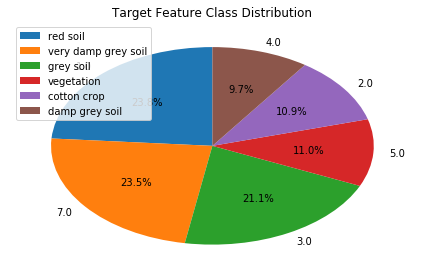

In [12]:
plotPieChart(df["class"], ["red soil", "very damp grey soil", "grey soil", "vegetation", "cotton crop", "damp grey soil"])

### Feature Distribution Histograms

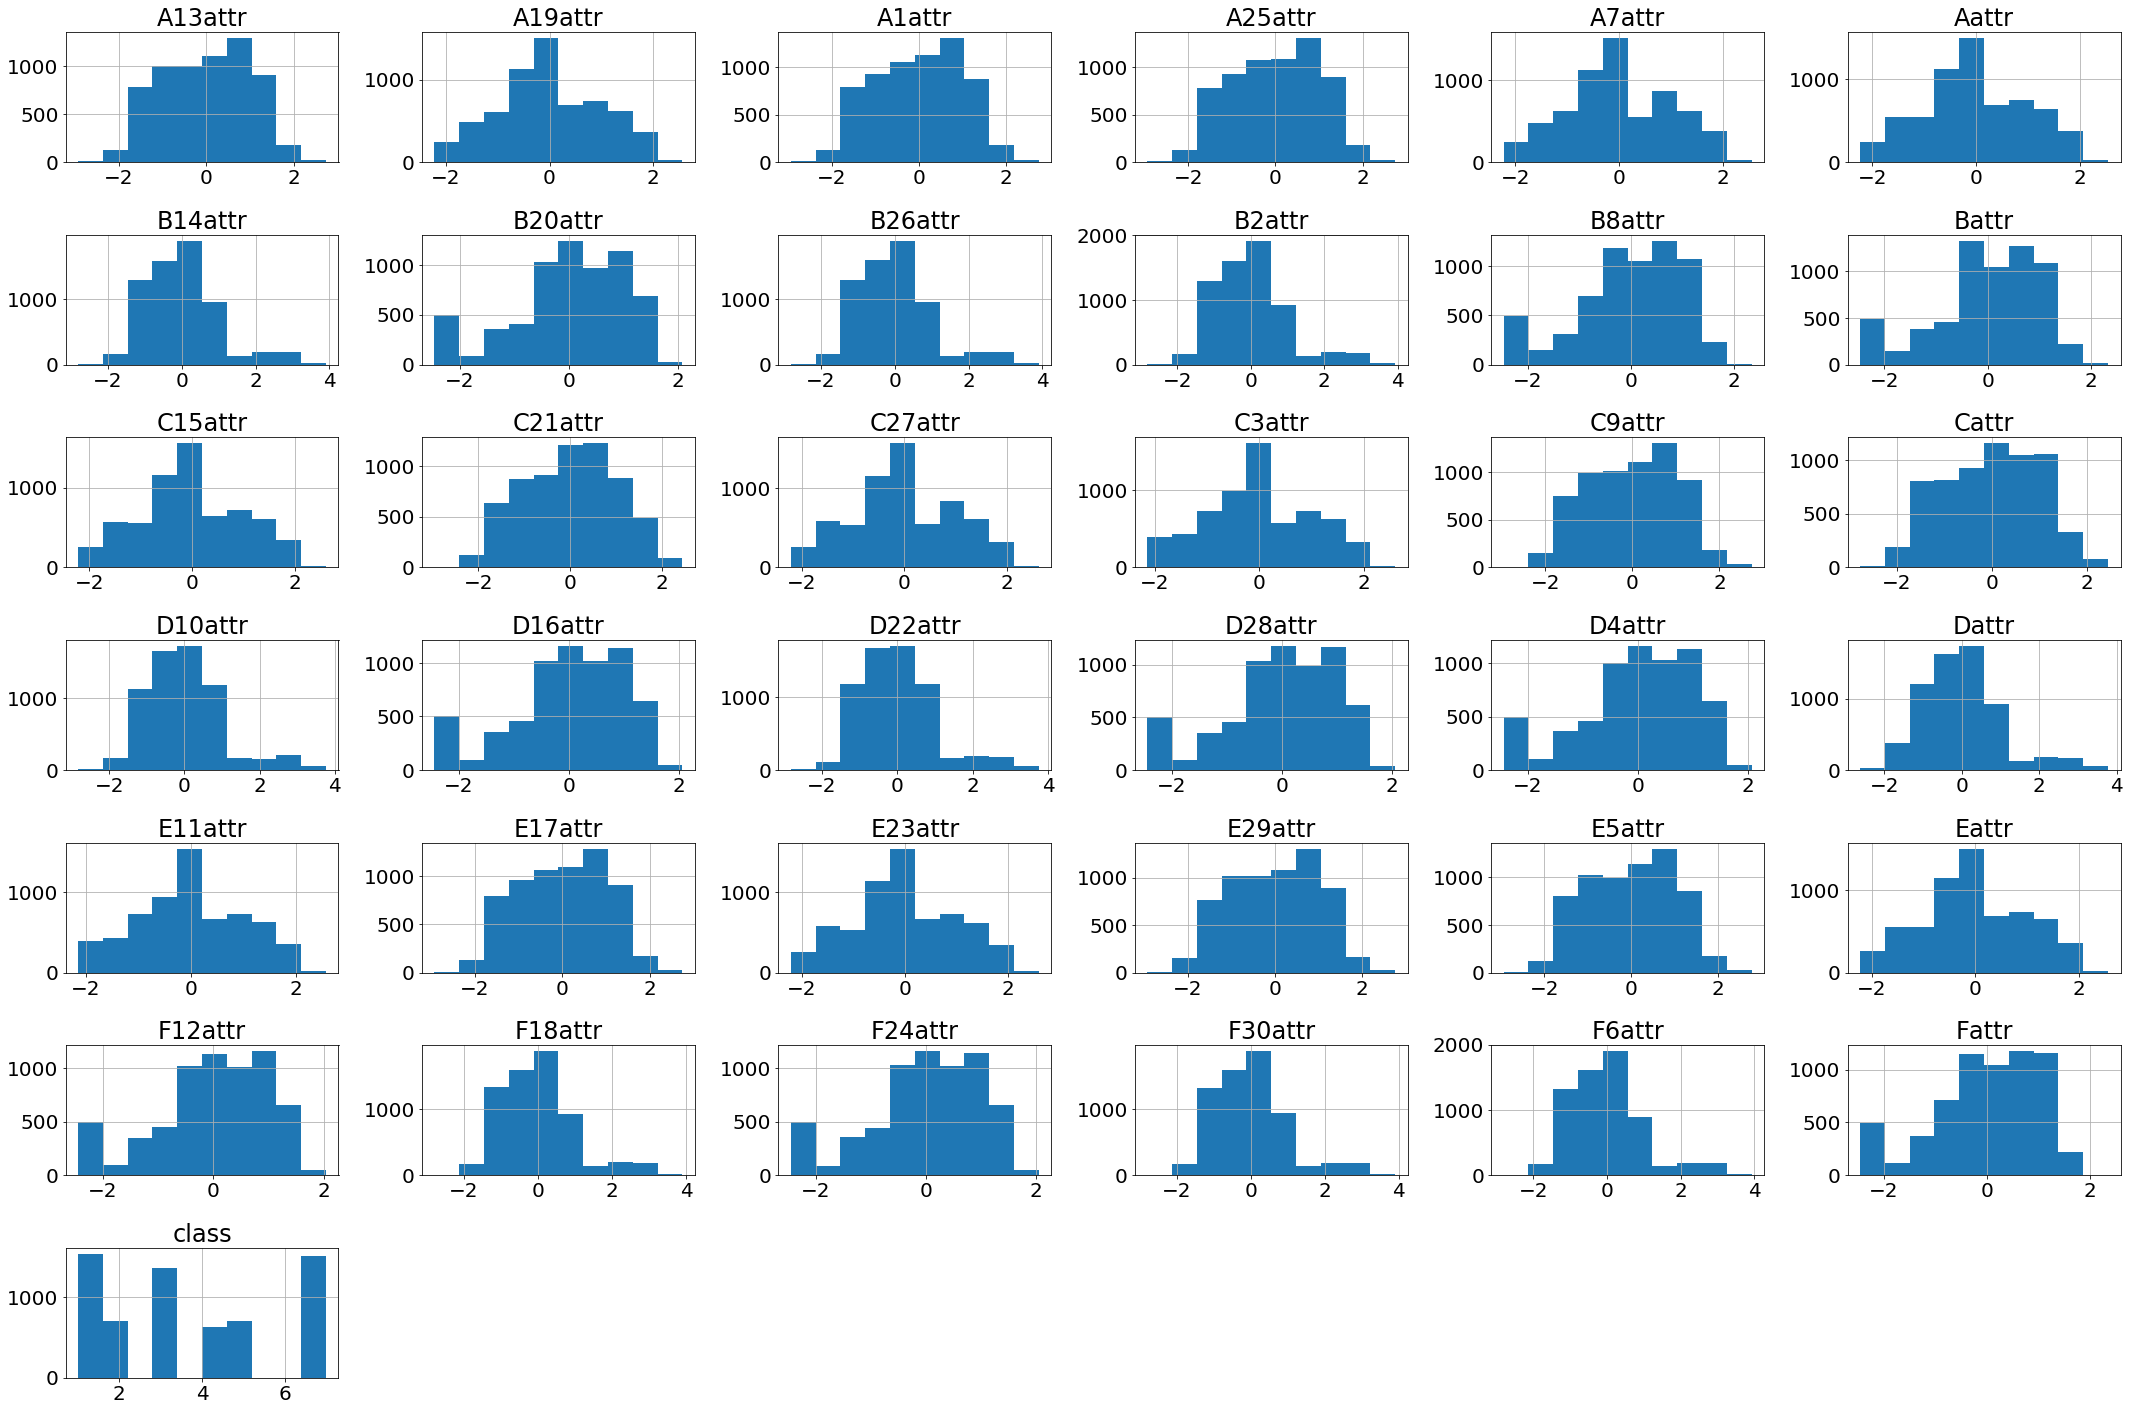

In [32]:
plotDistributionHistograms(df)

Furthermore for a better understanding of each class, each type of soil has been visualized and added to its corresponding color.

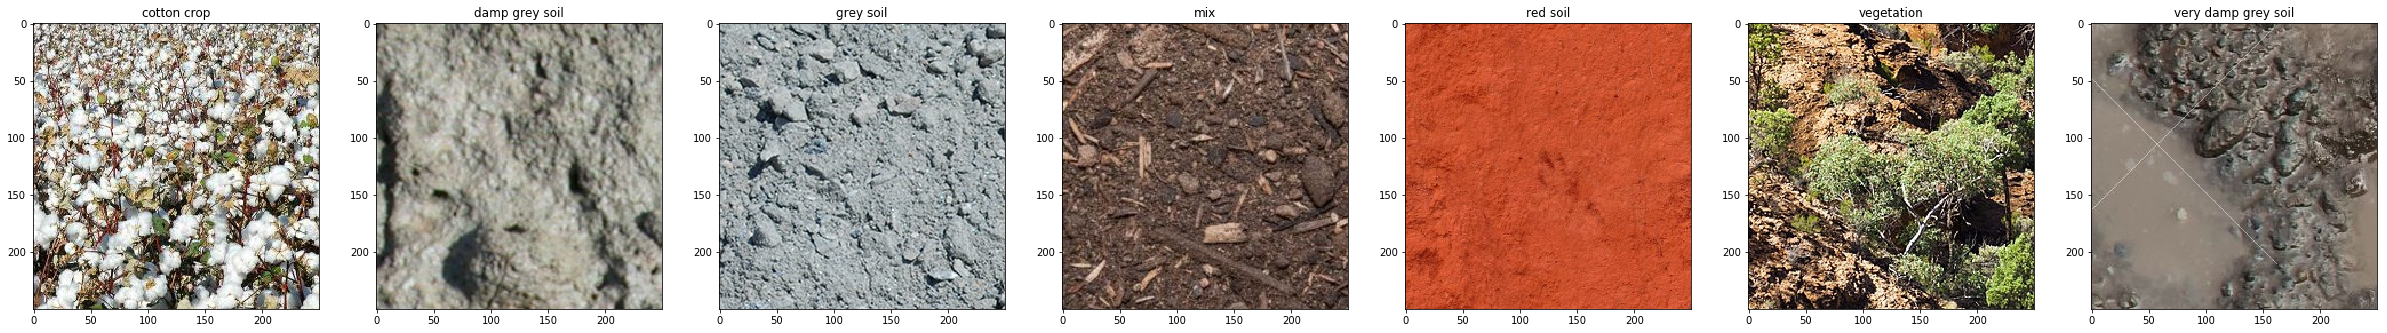

In [22]:
import imageio
import glob

soil_images = []

for im_path in glob.glob("../reports/figures/soil/*.png"):
    im = imageio.imread(im_path)
    soil_images.append(im)

show_images(soil_images, 1, ["cotton crop", "damp grey soil", "grey soil", "mix", "red soil", "vegetation", "very damp grey soil"])